# Rain Prediction in Sydeny AUS


I built a classifier to predict whether or not it will rain tomorrow in Sydney (Australia) by training a binary classification model. I have used the Rain in Australia dataset downloaded from the Kaggle website.

# 1.Data

In [31]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [32]:
data = pd.read_csv(r'C:\Users\97254\OneDrive\מסמכים\recs_Amit\class\weatherAUS.csv')
data.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [33]:
data.shape

(145460, 23)

In [34]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

In [35]:
data.drop_duplicates(inplace=True)
data.shape

(145460, 23)

In [36]:
sdn = data[data.Location == 'Sydney']
sdn.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
30176,2008-02-01,Sydney,19.5,22.4,15.6,6.2,0.0,NaN,NaN,S,...,92.0,84.0,1017.6,1017.4,8.0,8.0,20.7,20.9,Yes,Yes
30177,2008-02-02,Sydney,19.5,25.6,6.0,3.4,2.7,NaN,NaN,W,...,83.0,73.0,1017.9,1016.4,7.0,7.0,22.4,24.8,Yes,Yes
30178,2008-02-03,Sydney,21.6,24.5,6.6,2.4,0.1,NaN,NaN,ESE,...,88.0,86.0,1016.7,1015.6,7.0,8.0,23.5,23.0,Yes,Yes
30179,2008-02-04,Sydney,20.2,22.8,18.8,2.2,0.0,NaN,NaN,NNE,...,83.0,90.0,1014.2,1011.8,8.0,8.0,21.4,20.9,Yes,Yes
30180,2008-02-05,Sydney,19.7,25.7,77.4,NaN,0.0,NaN,NaN,NNE,...,88.0,74.0,1008.3,1004.8,8.0,8.0,22.5,25.5,Yes,Yes


In [37]:
sdn.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3344 entries, 30176 to 33519
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           3344 non-null   object 
 1   Location       3344 non-null   object 
 2   MinTemp        3340 non-null   float64
 3   MaxTemp        3342 non-null   float64
 4   Rainfall       3337 non-null   float64
 5   Evaporation    3293 non-null   float64
 6   Sunshine       3328 non-null   float64
 7   WindGustDir    2306 non-null   object 
 8   WindGustSpeed  2306 non-null   float64
 9   WindDir9am     3288 non-null   object 
 10  WindDir3pm     3311 non-null   object 
 11  WindSpeed9am   3318 non-null   float64
 12  WindSpeed3pm   3319 non-null   float64
 13  Humidity9am    3329 non-null   float64
 14  Humidity3pm    3331 non-null   float64
 15  Pressure9am    3323 non-null   float64
 16  Pressure3pm    3325 non-null   float64
 17  Cloud9am       2776 non-null   float64
 18  Clo

In [38]:
sdn.isnull().sum()

Date                0
Location            0
MinTemp             4
MaxTemp             2
Rainfall            7
Evaporation        51
Sunshine           16
WindGustDir      1038
WindGustSpeed    1038
WindDir9am         56
WindDir3pm         33
WindSpeed9am       26
WindSpeed3pm       25
Humidity9am        15
Humidity3pm        13
Pressure9am        21
Pressure3pm        19
Cloud9am          568
Cloud3pm          563
Temp9am             5
Temp3pm             4
RainToday           7
RainTomorrow        7
dtype: int64

#### I want to simplify the data more, so I will calculate average value of any XXX9am and XXX3pm

#### for romoving we will fill Nan with most common value of yhe column

In [50]:
sdn['WindSpeed9am'].fillna(value=sdn['WindSpeed9am'].mode()[0],inplace=True )


In [51]:
sdn['WindSpeed3pm'].fillna(value=sdn['WindSpeed3pm'].mode()[0],inplace=True )
sdn['WindDir9am'].fillna(value=sdn['WindDir9am'].mode()[0],inplace=True )
sdn['WindDir3pm'].fillna(value=sdn['WindDir3pm'].mode()[0],inplace=True )
sdn['Humidity9am'].fillna(value=sdn['Humidity9am'].mode()[0],inplace=True )
sdn['Humidity3pm'].fillna(value=sdn['Humidity3pm'].mode()[0],inplace=True )
sdn['Pressure9am'].fillna(value=sdn['Pressure9am'].mode()[0],inplace=True )
sdn['Pressure3pm'].fillna(value=sdn['Pressure3pm'].mode()[0],inplace=True )
sdn['Cloud9am'].fillna(value=sdn['Cloud9am'].mode()[0],inplace=True )
sdn['Cloud3pm'].fillna(value=sdn['Cloud3pm'].mode()[0],inplace=True )
sdn['Temp9am'].fillna(value=sdn['Temp9am'].mode()[0],inplace=True )
sdn['Temp3pm'].fillna(value=sdn['Temp3pm'].mode()[0],inplace=True )



In [52]:
sdn.isnull().sum()

Date                0
Location            0
MinTemp             4
MaxTemp             2
Rainfall            7
Evaporation        51
Sunshine           16
WindGustDir      1038
WindGustSpeed    1038
WindDir9am          0
WindDir3pm          0
WindSpeed9am        0
WindSpeed3pm        0
Humidity9am         0
Humidity3pm         0
Pressure9am         0
Pressure3pm         0
Cloud9am            0
Cloud3pm            0
Temp9am             0
Temp3pm             0
RainToday           7
RainTomorrow        7
WindSpeed          26
Humidity            0
Pressure            0
Cloud               0
Temp                0
dtype: int64

In [53]:
sdn['WindSpeed'] = (sdn['WindSpeed9am'] + sdn['WindSpeed3pm'])/2

<ipython-input-53-aa42156c7a3e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sdn['WindSpeed'] = (sdn['WindSpeed9am'] + sdn['WindSpeed3pm'])/2


In [54]:
sdn['Humidity'] = (sdn['Humidity9am'] + sdn['Humidity3pm'])/2
sdn['Pressure'] = (sdn['Pressure9am'] + sdn['Pressure3pm'])/2
sdn['Cloud'] = (sdn['Cloud9am'] + sdn['Cloud3pm'])/2
sdn['Temp'] = (sdn['Temp9am'] + sdn['Temp3pm'])/2

<ipython-input-54-3cee194fd84c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sdn['Humidity'] = (sdn['Humidity9am'] + sdn['Humidity3pm'])/2
<ipython-input-54-3cee194fd84c>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sdn['Pressure'] = (sdn['Pressure9am'] + sdn['Pressure3pm'])/2
<ipython-input-54-3cee194fd84c>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http

In [56]:
sdn = sdn.drop(['Humidity9am', 'Humidity3pm', 'Pressure3pm', 'Pressure9am', 'Cloud3pm', 'Cloud9am', 'Temp3pm', 'Temp9am'], axis=1)

In [57]:
sdn.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,RainToday,RainTomorrow,WindSpeed,Humidity,Pressure,Cloud,Temp
30176,2008-02-01,Sydney,19.5,22.4,15.6,6.2,0.0,NaN,NaN,S,SSW,17.0,20.0,Yes,Yes,18.5,88.0,1017.50,8.0,20.80
30177,2008-02-02,Sydney,19.5,25.6,6.0,3.4,2.7,NaN,NaN,W,E,9.0,13.0,Yes,Yes,11.0,78.0,1017.15,7.0,23.60
30178,2008-02-03,Sydney,21.6,24.5,6.6,2.4,0.1,NaN,NaN,ESE,ESE,17.0,2.0,Yes,Yes,9.5,87.0,1016.15,7.5,23.25
30179,2008-02-04,Sydney,20.2,22.8,18.8,2.2,0.0,NaN,NaN,NNE,E,22.0,20.0,Yes,Yes,21.0,86.5,1013.00,8.0,21.15
30180,2008-02-05,Sydney,19.7,25.7,77.4,NaN,0.0,NaN,NaN,NNE,W,11.0,6.0,Yes,Yes,8.5,81.0,1006.55,8.0,24.00


In [58]:
sdn = sdn.drop(['WindSpeed9am', 'WindSpeed3pm'], axis=1)

#### We have temp average so we can remove Min\maxTemp columns

In [59]:
sdn = sdn.drop(['MinTemp', 'MaxTemp'], axis=1)

In [61]:
sdn.head()

,Date,Location,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,RainToday,RainTomorrow,WindSpeed,Humidity,Pressure,Cloud,Temp
30176,2008-02-01,Sydney,15.6,6.2,0.0,NaN,NaN,S,SSW,Yes,Yes,18.5,88.0,1017.50,8.0,20.80
30177,2008-02-02,Sydney,6.0,3.4,2.7,NaN,NaN,W,E,Yes,Yes,11.0,78.0,1017.15,7.0,23.60
30178,2008-02-03,Sydney,6.6,2.4,0.1,NaN,NaN,ESE,ESE,Yes,Yes,9.5,87.0,1016.15,7.5,23.25
30179,2008-02-04,Sydney,18.8,2.2,0.0,NaN,NaN,NNE,E,Yes,Yes,21.0,86.5,1013.00,8.0,21.15
30180,2008-02-05,Sydney,77.4,NaN,0.0,NaN,NaN,NNE,W,Yes,Yes,8.5,81.0,1006.55,8.0,24.00


In [62]:
sdn.sort_values(by=['Date'])
sdn = sdn.drop(['Location'], axis=1)

In [63]:
sdn['RainToday'].fillna(value=sdn['RainToday'].mode()[0],inplace=True )
sdn['RainTomorrow'].fillna(value=sdn['RainTomorrow'].mode()[0],inplace=True )

In [64]:
sdn.isnull().sum()

Date                0
Rainfall            7
Evaporation        51
Sunshine           16
WindGustDir      1038
WindGustSpeed    1038
WindDir9am          0
WindDir3pm          0
RainToday           0
RainTomorrow        0
WindSpeed           0
Humidity            0
Pressure            0
Cloud               0
Temp                0
dtype: int64

In [65]:
sdn['Date'] = pd.to_datetime(sdn['Date'])
sdn['Year'] = sdn['Date'].dt.year
sdn['Month'] = sdn['Date'].dt.month
sdn['Day'] = sdn['Date'].dt.day

sdn = sdn.drop(columns='Date')

In [66]:
sdn.isnull().sum()

Rainfall            7
Evaporation        51
Sunshine           16
WindGustDir      1038
WindGustSpeed    1038
WindDir9am          0
WindDir3pm          0
RainToday           0
RainTomorrow        0
WindSpeed           0
Humidity            0
Pressure            0
Cloud               0
Temp                0
Year                0
Month               0
Day                 0
dtype: int64

In [67]:
sdn.head()

,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,RainToday,RainTomorrow,WindSpeed,Humidity,Pressure,Cloud,Temp,Year,Month,Day
30176,15.6,6.2,0.0,NaN,NaN,S,SSW,Yes,Yes,18.5,88.0,1017.50,8.0,20.80,2008,2,1
30177,6.0,3.4,2.7,NaN,NaN,W,E,Yes,Yes,11.0,78.0,1017.15,7.0,23.60,2008,2,2
30178,6.6,2.4,0.1,NaN,NaN,ESE,ESE,Yes,Yes,9.5,87.0,1016.15,7.5,23.25,2008,2,3
30179,18.8,2.2,0.0,NaN,NaN,NNE,E,Yes,Yes,21.0,86.5,1013.00,8.0,21.15,2008,2,4
30180,77.4,NaN,0.0,NaN,NaN,NNE,W,Yes,Yes,8.5,81.0,1006.55,8.0,24.00,2008,2,5


In [68]:
sdn['Evaporation'].fillna(value=sdn['Evaporation'].mode()[0],inplace=True )
sdn['Rainfall'].fillna(value=sdn['Rainfall'].mode()[0],inplace=True )
sdn['Sunshine'].fillna(value=sdn['Sunshine'].mode()[0],inplace=True )

In [69]:
sdn.isnull().sum()

Rainfall            0
Evaporation         0
Sunshine            0
WindGustDir      1038
WindGustSpeed    1038
WindDir9am          0
WindDir3pm          0
RainToday           0
RainTomorrow        0
WindSpeed           0
Humidity            0
Pressure            0
Cloud               0
Temp                0
Year                0
Month               0
Day                 0
dtype: int64

In [70]:
sdn.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3344 entries, 30176 to 33519
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Rainfall       3344 non-null   float64
 1   Evaporation    3344 non-null   float64
 2   Sunshine       3344 non-null   float64
 3   WindGustDir    2306 non-null   object 
 4   WindGustSpeed  2306 non-null   float64
 5   WindDir9am     3344 non-null   object 
 6   WindDir3pm     3344 non-null   object 
 7   RainToday      3344 non-null   object 
 8   RainTomorrow   3344 non-null   object 
 9   WindSpeed      3344 non-null   float64
 10  Humidity       3344 non-null   float64
 11  Pressure       3344 non-null   float64
 12  Cloud          3344 non-null   float64
 13  Temp           3344 non-null   float64
 14  Year           3344 non-null   int64  
 15  Month          3344 non-null   int64  
 16  Day            3344 non-null   int64  
dtypes: float64(9), int64(3), object(5)
memory usage

In [71]:
sdn = pd.get_dummies(sdn,columns=['RainToday'], drop_first=True)

In [72]:
sdn = pd.get_dummies(sdn,columns=['RainTomorrow'], drop_first=True)

In [73]:
sdn.head()

,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed,Humidity,Pressure,Cloud,Temp,Year,Month,Day,RainToday_Yes,RainTomorrow_Yes
30176,15.6,6.2,0.0,NaN,NaN,S,SSW,18.5,88.0,1017.50,8.0,20.80,2008,2,1,1,1
30177,6.0,3.4,2.7,NaN,NaN,W,E,11.0,78.0,1017.15,7.0,23.60,2008,2,2,1,1
30178,6.6,2.4,0.1,NaN,NaN,ESE,ESE,9.5,87.0,1016.15,7.5,23.25,2008,2,3,1,1
30179,18.8,2.2,0.0,NaN,NaN,NNE,E,21.0,86.5,1013.00,8.0,21.15,2008,2,4,1,1
30180,77.4,4.0,0.0,NaN,NaN,NNE,W,8.5,81.0,1006.55,8.0,24.00,2008,2,5,1,1


In [77]:
sdn = pd.get_dummies(sdn,columns=['WindDir9am'], drop_first=True)
sdn = pd.get_dummies(sdn,columns=['WindDir3pm'], drop_first=True)


KeyError: "None of [Index(['WindDir9am'], dtype='object')] are in the [columns]"

In [79]:
sdn.head()

,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindSpeed,Humidity,Pressure,Cloud,Temp,...,WindDir3pm_NNW,WindDir3pm_NW,WindDir3pm_S,WindDir3pm_SE,WindDir3pm_SSE,WindDir3pm_SSW,WindDir3pm_SW,WindDir3pm_W,WindDir3pm_WNW,WindDir3pm_WSW
30176,15.6,6.2,0.0,NaN,NaN,18.5,88.0,1017.50,8.0,20.80,...,0,0,0,0,0,1,0,0,0,0
30177,6.0,3.4,2.7,NaN,NaN,11.0,78.0,1017.15,7.0,23.60,...,0,0,0,0,0,0,0,0,0,0
30178,6.6,2.4,0.1,NaN,NaN,9.5,87.0,1016.15,7.5,23.25,...,0,0,0,0,0,0,0,0,0,0
30179,18.8,2.2,0.0,NaN,NaN,21.0,86.5,1013.00,8.0,21.15,...,0,0,0,0,0,0,0,0,0,0
30180,77.4,4.0,0.0,NaN,NaN,8.5,81.0,1006.55,8.0,24.00,...,0,0,0,0,0,0,0,1,0,0


In [80]:
sdn_matrix_corr = sdn.corr()
sdn_matrix_corr.RainTomorrow_Yes

Rainfall            0.293934
Evaporation        -0.069448
Sunshine           -0.517219
WindGustSpeed       0.174079
WindSpeed           0.034688
Humidity            0.442175
Pressure           -0.010377
Cloud               0.411039
Temp               -0.092685
Year                0.001924
Month              -0.049176
Day                -0.021059
RainToday_Yes       0.341377
RainTomorrow_Yes    1.000000
WindDir9am_ENE      0.005837
WindDir9am_ESE      0.031940
WindDir9am_N       -0.011496
WindDir9am_NE       0.001185
WindDir9am_NNE     -0.003331
WindDir9am_NNW     -0.038954
WindDir9am_NW      -0.004283
WindDir9am_S        0.079811
WindDir9am_SE       0.093780
WindDir9am_SSE      0.080358
WindDir9am_SSW      0.124533
WindDir9am_SW       0.043555
WindDir9am_W       -0.101983
WindDir9am_WNW     -0.085545
WindDir9am_WSW     -0.015505
WindDir3pm_ENE     -0.090241
WindDir3pm_ESE      0.014882
WindDir3pm_N        0.008059
WindDir3pm_NE      -0.060387
WindDir3pm_NNE      0.047075
WindDir3pm_NNW

In [81]:
sdn = sdn.drop(columns=['WindDir3pm_WSW', 'WindDir3pm_WNW', 'WindDir3pm_W', 'WindDir3pm_SW','WindDir3pm_SSW',
                       'WindDir3pm_SSE', 'WindDir3pm_SE', 'WindDir3pm_S', 'WindDir3pm_NW', 'WindDir3pm_NNW',
                       'WindDir3pm_NNE', 'WindDir3pm_NE', 'WindDir3pm_N', 'WindDir3pm_ESE',  'WindDir3pm_ENE'
                       ])

In [86]:
list(sdn)[-15:]

['WindDir9am_ENE',
 'WindDir9am_ESE',
 'WindDir9am_N',
 'WindDir9am_NE',
 'WindDir9am_NNE',
 'WindDir9am_NNW',
 'WindDir9am_NW',
 'WindDir9am_S',
 'WindDir9am_SE',
 'WindDir9am_SSE',
 'WindDir9am_SSW',
 'WindDir9am_SW',
 'WindDir9am_W',
 'WindDir9am_WNW',
 'WindDir9am_WSW']

In [87]:
sdn = sdn.drop(columns=list(sdn)[-15:])

In [89]:
sdn = sdn.drop(columns='WindGustSpeed')

In [90]:
sdn = sdn.drop(columns='WindGustDir')

In [91]:
sdn

,Rainfall,Evaporation,Sunshine,WindSpeed,Humidity,Pressure,Cloud,Temp,Year,Month,Day,RainToday_Yes,RainTomorrow_Yes
30176,15.6,6.2,0.0,18.5,88.0,1017.50,8.0,20.80,2008,2,1,1,1
30177,6.0,3.4,2.7,11.0,78.0,1017.15,7.0,23.60,2008,2,2,1,1
30178,6.6,2.4,0.1,9.5,87.0,1016.15,7.5,23.25,2008,2,3,1,1
30179,18.8,2.2,0.0,21.0,86.5,1013.00,8.0,21.15,2008,2,4,1,1
30180,77.4,4.0,0.0,8.5,81.0,1006.55,8.0,24.00,2008,2,5,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
33515,0.0,2.0,7.8,21.0,62.5,1025.60,2.0,14.20,2017,6,21,0,0
33516,0.0,2.0,9.2,13.5,65.5,1026.55,2.0,14.85,2017,6,22,0,0
33517,0.0,2.4,2.7,14.0,70.5,1017.90,6.0,13.75,2017,6,23,0,0
33518,0.0,1.4,9.3,18.0,45.5,1016.20,3.5,15.70,2017,6,24,0,0


# 2. Data analytics

after filtering the data, I want to see the connections between the features to the prediction

Text(0, 0.5, 'Rain Tomorrow')

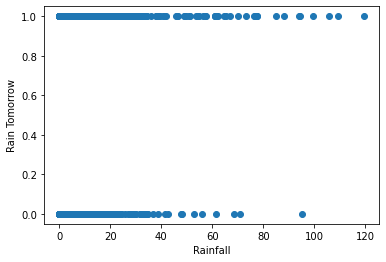

In [49]:
plt.scatter(x = sdn['Rainfall'], y = sdn['RainTomorrow_Yes'])
plt.xlabel("Rainfall")
plt.ylabel("Rain Tomorrow")

Text(0, 0.5, 'Rain Tomorrow')

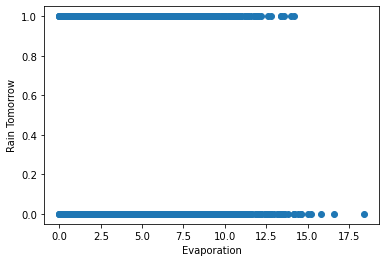

In [51]:
plt.scatter(x = sdn['Evaporation'], y = sdn['RainTomorrow_Yes'])
plt.xlabel("Evaporation")
plt.ylabel("Rain Tomorrow")

Text(0, 0.5, 'Rain Tomorrow')

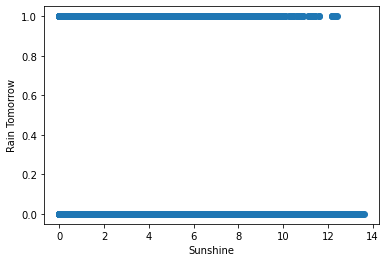

In [52]:
plt.scatter(x = sdn['Sunshine'], y = sdn['RainTomorrow_Yes'])
plt.xlabel("Sunshine")
plt.ylabel("Rain Tomorrow")

Text(0, 0.5, 'Rain Tomorrow')

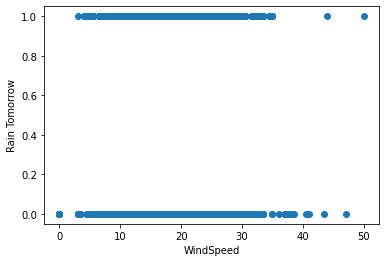

In [53]:
plt.scatter(x = sdn['WindSpeed'], y = sdn['RainTomorrow_Yes'])
plt.xlabel("WindSpeed")
plt.ylabel("Rain Tomorrow")

Text(0, 0.5, 'Rain Tomorrow')

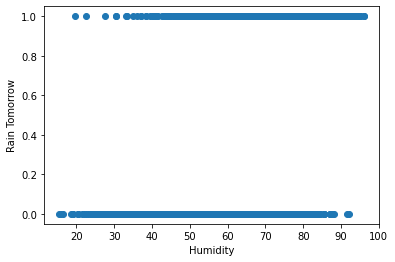

In [54]:
plt.scatter(x = sdn['Humidity'], y = sdn['RainTomorrow_Yes'])
plt.xlabel("Humidity")
plt.ylabel("Rain Tomorrow")

Text(0, 0.5, 'Rain Tomorrow')

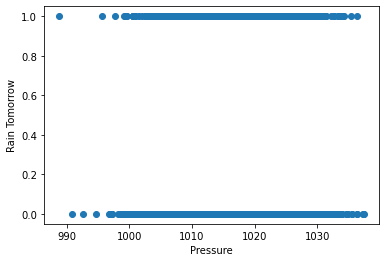

In [55]:
plt.scatter(x = sdn['Pressure'], y = sdn['RainTomorrow_Yes'])
plt.xlabel("Pressure")
plt.ylabel("Rain Tomorrow")

Text(0, 0.5, 'Rain Tomorrow')

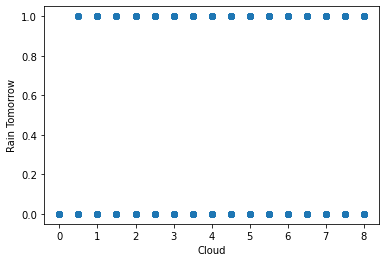

In [56]:
plt.scatter(x = sdn['Cloud'], y = sdn['RainTomorrow_Yes'])
plt.xlabel("Cloud")
plt.ylabel("Rain Tomorrow")

Text(0, 0.5, 'Rain Tomorrow')

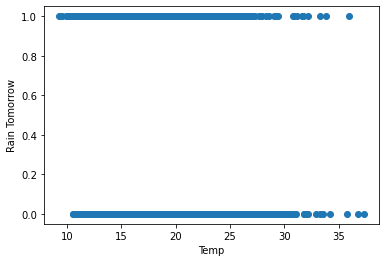

In [57]:
plt.scatter(x = sdn['Temp'], y = sdn['RainTomorrow_Yes'])
plt.xlabel("Temp")
plt.ylabel("Rain Tomorrow")

Text(0, 0.5, 'Rain Tomorrow')

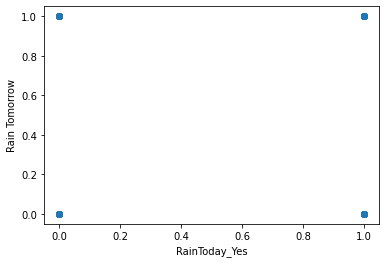

In [58]:
plt.scatter(x = sdn['RainToday_Yes'], y = sdn['RainTomorrow_Yes'])
plt.xlabel("RainToday_Yes")
plt.ylabel("Rain Tomorrow")

In [92]:
sdn.RainTomorrow_Yes.value_counts()

0    2479
1     865
Name: RainTomorrow_Yes, dtype: int64

## I see that the dataset isn't balanced, I have more record that it wouldn't rain tommorow, that's why I'm expecting that the model would classify better no rain tommorow.


In [93]:
corr_matrix = sdn.corr()
corr_matrix.RainTomorrow_Yes

Rainfall            0.293934
Evaporation        -0.069448
Sunshine           -0.517219
WindSpeed           0.034688
Humidity            0.442175
Pressure           -0.010377
Cloud               0.411039
Temp               -0.092685
Year                0.001924
Month              -0.049176
Day                -0.021059
RainToday_Yes       0.341377
RainTomorrow_Yes    1.000000
Name: RainTomorrow_Yes, dtype: float64

# 3. Model training

## 3.1 KNN

In [98]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

In [99]:
X = sdn.drop(['RainTomorrow_Yes'], axis=1)
y = sdn['RainTomorrow_Yes']

In [100]:
scaler = MinMaxScaler()
X = scaler.fit_transform(X)
X

array([[0.13065327, 0.33695652, 0.        , ..., 0.09090909, 0.        ,
        1.        ],
       [0.05025126, 0.18478261, 0.19852941, ..., 0.09090909, 0.03333333,
        1.        ],
       [0.05527638, 0.13043478, 0.00735294, ..., 0.09090909, 0.06666667,
        1.        ],
       ...,
       [0.        , 0.13043478, 0.19852941, ..., 0.45454545, 0.73333333,
        0.        ],
       [0.        , 0.07608696, 0.68382353, ..., 0.45454545, 0.76666667,
        0.        ],
       [0.        , 0.18478261, 0.69117647, ..., 0.45454545, 0.8       ,
        0.        ]])

In [101]:
cols = sdn.columns
X = pd.DataFrame(X, columns=[cols[:-1]])
X

,Rainfall,Evaporation,Sunshine,WindSpeed,Humidity,Pressure,Cloud,Temp,Year,Month,Day,RainToday_Yes
0,0.130653,0.336957,0.000000,0.37,0.900621,0.590113,1.0000,0.410714,0.0,0.090909,0.000000,1.0
1,0.050251,0.184783,0.198529,0.22,0.776398,0.582904,0.8750,0.510714,0.0,0.090909,0.033333,1.0
2,0.055276,0.130435,0.007353,0.19,0.888199,0.562307,0.9375,0.498214,0.0,0.090909,0.066667,1.0
3,0.157454,0.119565,0.000000,0.42,0.881988,0.497425,1.0000,0.423214,0.0,0.090909,0.100000,1.0
4,0.648241,0.217391,0.000000,0.17,0.813665,0.364573,1.0000,0.525000,0.0,0.090909,0.133333,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
3339,0.000000,0.108696,0.573529,0.42,0.583851,0.756952,0.2500,0.175000,1.0,0.454545,0.666667,0.0
3340,0.000000,0.108696,0.676471,0.27,0.621118,0.776519,0.2500,0.198214,1.0,0.454545,0.700000,0.0
3341,0.000000,0.130435,0.198529,0.28,0.683230,0.598352,0.7500,0.158929,1.0,0.454545,0.733333,0.0
3342,0.000000,0.076087,0.683824,0.36,0.372671,0.563337,0.4375,0.228571,1.0,0.454545,0.766667,0.0


In [106]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 2)


best K results was with k=28 and the accuracy was 0.8251121076233184


Text(0, 0.5, 'Accuracy score')

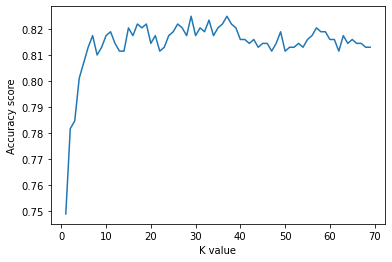

In [115]:
from sklearn.metrics import accuracy_score

k_range = range(1,70)
scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train,y_train)
    y_pred=knn.predict(X_test)
#     print('{0:0.4f}'.format(accuracy_score(y_test, y_pred)))
    scores.append(accuracy_score(y_test, y_pred))

print("best K results was with k={} and the accuracy was {}".format(scores.index(max(scores)), max(scores)))
#     we indeed would like the max value since we'd get as many bigger correct predictions as possible

plt.plot(k_range,scores)
plt.xlabel("K value")
plt.ylabel("Accuracy score")

#### With K = 28 we received the best accuracy of 0.82511

## 3.2 Logistic Regression

In [116]:
from sklearn.linear_model import LogisticRegression

In [117]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
print('Model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score: 0.8296


### We can see that the accuracy of logistic regression is 0.8296 when the best accuracy with KNN we get is 0.82511 

In [118]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, y_pred)

array([[454,  22],
       [ 92, 101]], dtype=int64)

In [133]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve


fpr, tpr ,trh =roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
#a function that takes acutal values from test set and its predicted probability. 
#It generates fpr tpr for each existed threshold.

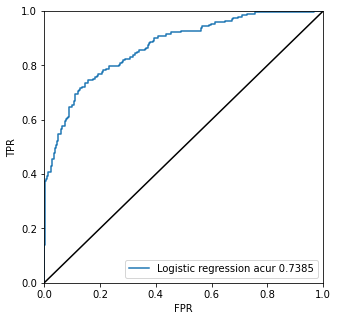

In [134]:
roc_auc = roc_auc_score(y_test, y_pred)
plt.figure(figsize=(5,5))
plt.plot(fpr,tpr, label="Logistic regression acur {0:0.4f}".format(roc_auc))
plt.plot([0,1],[0,1], color="black")
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.ylim([0,1])
plt.xlim([0,1])
plt.legend()